<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/01_tensorflow_NN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##01. Neural Network Regression with TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.linspace(-7.0, 14, 8)
y = np.linspace(3.0, 24, 8)

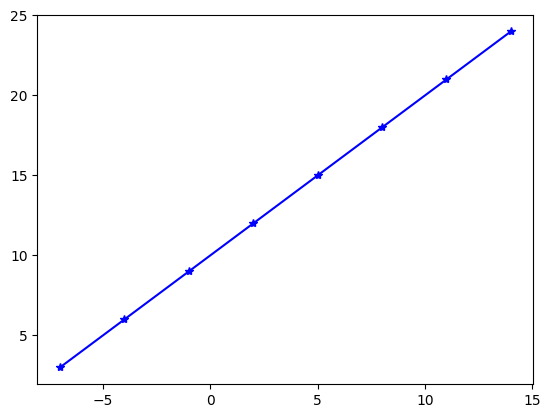

In [4]:
plt.plot(X,y, '*-b')

In [5]:
X = tf.constant(X)
y = tf.constant(y)

In [6]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

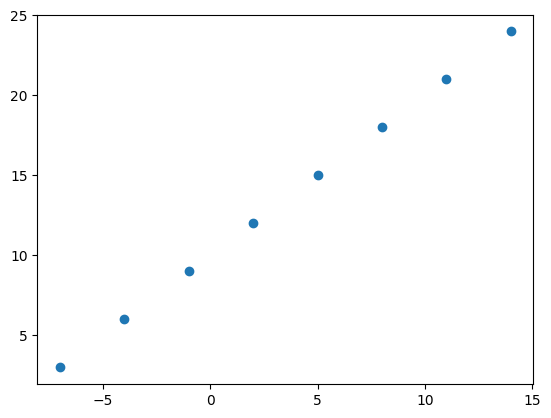

In [7]:
plt.scatter(X,y)

# Creating model with TensorFlow


*   Create model
*   Compile model
*   Fit model
*   Evaluate model





In [8]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer = 'sgd', loss = tf.keras.losses.mse, metrics = 'mae')
model.fit(tf.expand_dims(X, -1), y, epochs = 10)

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 241.3184 - mae: 13.7147
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 81.5772 - mae: 7.3424
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 73.2784 - mae: 7.8111
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 70.7609 - mae: 7.4263
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 68.5306 - mae: 7.3595
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 66.3782 - mae: 7.2331
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 64.2937 - mae: 7.1206
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 62.2747 - mae: 7.0075
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 60.3191 - mae: 6.8967
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 58.4249 - mae: 6.7875


1/1 [==============================] - 0s 72ms/step


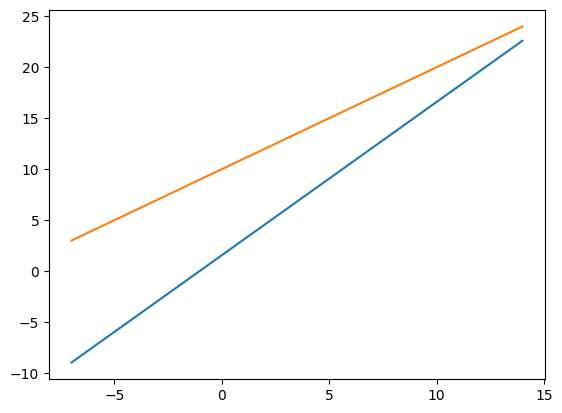

In [9]:
y_predict = model.predict(X)
plt.plot(X, y_predict)
plt.plot(X,y)

### Improving model:
**1. creting model** : change layrs, change number of neurons, chanhe activation function

**2. compile model** : change optimizer, change lerning rate, change loss function
**3. fit model** : change number of data, change number of epochs

In [10]:
tf.random.set_seed(42)
model_dif = tf.keras.Sequential((
  tf.keras.layers.Dense(50, 'relu'),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(50))
)
model_dif.add(tf.keras.layers.Dense(1))
model_dif.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = tf.keras.losses.mae, metrics = 'mae')
history = model_dif.fit(tf.expand_dims(X, -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.1374 - mae: 14.1374
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 9.5321 - mae: 9.5321
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 5.2528 - mae: 5.2528
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 5.3937 - mae: 5.3937
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 6.9275 - mae: 6.9275
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 5.3762 - mae: 5.3762
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 3.8266 - mae: 3.8266
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 4.8744 - mae: 4.8744
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 5.1952 - mae: 5.1952
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 4.1140 - mae: 4.1140
Epoch 11/100
1/1 [==============================] - 0s 18ms/step - los

1/1 [==============================] - 0s 96ms/step


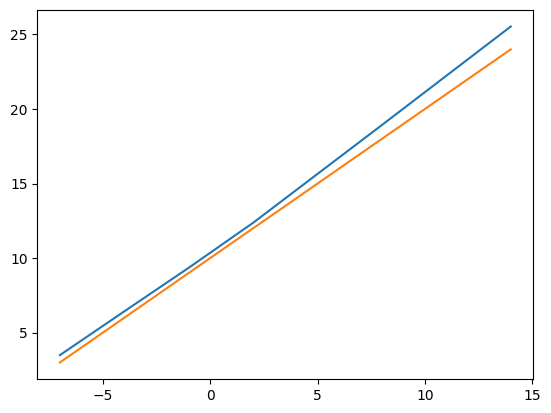

In [11]:
plt.plot(X, model_dif.predict(X))
plt.plot(X,y)
plt.show()

In [12]:
model_dif.predict(X)

1/1 [==============================] - 0s 31ms/step


array([[ 3.4934971],
       [ 6.427904 ],
       [ 9.351105 ],
       [12.36854  ],
       [15.648342 ],
       [18.92676  ],
       [22.22967  ],
       [25.532722 ]], dtype=float32)

In [13]:
y

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_dif.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                100       
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


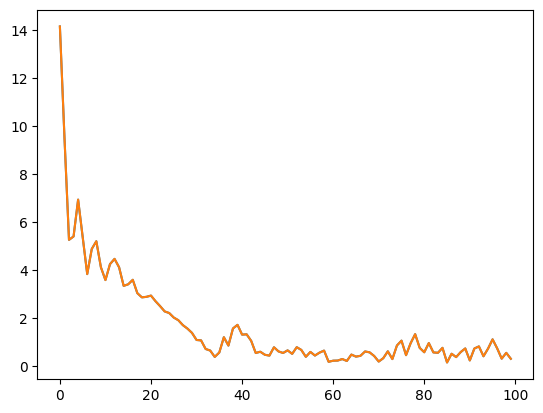

In [16]:
import pandas as pd
plt.plot(pd.DataFrame(history.history))

In [17]:
pd.DataFrame(history.history)

,loss,mae
0,14.137412,14.137412
1,9.532125,9.532125
2,5.252847,5.252847
3,5.393700,5.393700
4,6.927472,6.927472
...,...,...
95,1.109420,1.109420
96,0.737058,0.737058
97,0.305116,0.305116
98,0.548146,0.548146


## Plot of model


In [18]:
from keras.utils import plot_model

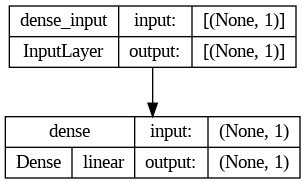

In [19]:
plot_model(model,show_shapes = True, show_layer_activations=True)

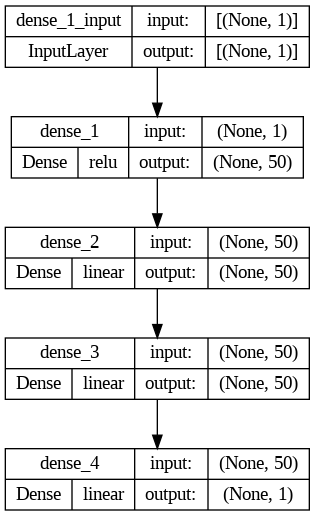

In [20]:
plot_model(model_dif,show_shapes = True, show_layer_activations=True)

1/1 [==============================] - 0s 48ms/step


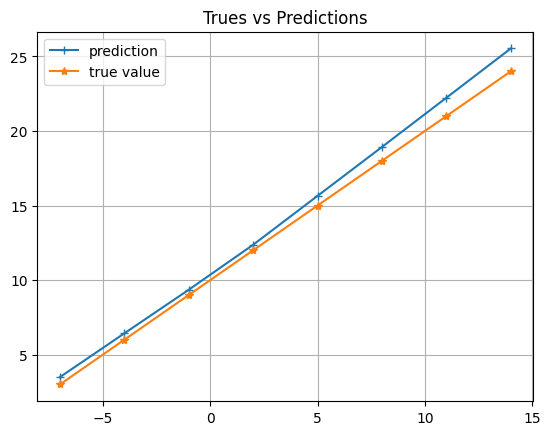

In [21]:
plt.plot(X, model_dif.predict(X), '+-', label = 'prediction')
plt.plot(X,y, '*-', label ='true value')
plt.title("Trues vs Predictions")
plt.grid(True)
plt.legend()
plt.show()

## Evaluate model
- MAE - mean absolute error (sensitive to outliers)
- MSE - mean squear error (not sensitive to outliers)
- Huber - combinations of mae, mse

In [33]:
from keras.metrics import mean_absolute_error
from keras.metrics import mean_squared_error
from keras.losses import Huber 

In [23]:
y_predict = model_dif.predict(X)

1/1 [==============================] - 0s 36ms/step


In [29]:
y_predict = tf.squeeze(y_predict)
y_predict

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([ 3.4934971,  6.427904 ,  9.351105 , 12.36854  , 15.648342 ,
       18.92676  , 22.22967  , 25.532722 ], dtype=float32)>

In [30]:
# calulation mae
mean_absolute_error(y, y_predict)

<tf.Tensor: shape=(), dtype=float32, numpy=0.74731743>

In [32]:
# calulation mse
mse = mean_squared_error(y, y_predict)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.72828674>

In [35]:
# calculate huber metrics
huber = Huber()
huber(y, y_predict)

<tf.Tensor: shape=(), dtype=float32, numpy=0.34310955>

##Saving model
There two saving formats in TensorFlow we can use to save model:
1. SavedModel format
2. The HDF5 format

In [37]:
# save SaveModel format

model_dif.save("best_model_SaveModel_format")

In [38]:
# save model using HDF5 format
model_dif.save("best_model_HDF5_format.h5")

## Loading a saved model

In [39]:
# Loading a saved model SavedModel format
model_savedmodel = tf.keras.models.load_model('/content/best_model_SaveModel_format')


In [40]:
model_savedmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                100       
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


In [42]:
model_hdf5 = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')

In [43]:
model_hdf5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                100       
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


In [44]:
y2 = model_savedmodel.predict(X)

1/1 [==============================] - 0s 263ms/step


In [45]:
y3 = model_hdf5.predict(X)

1/1 [==============================] - 0s 240ms/step


In [46]:
y2==y3

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [47]:
tf.squeeze(y2) == y_predict

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>